In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.shape

(200, 5)

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
col=df.select_dtypes("int64").columns

AxesSubplot(0.125,0.11;0.775x0.77)


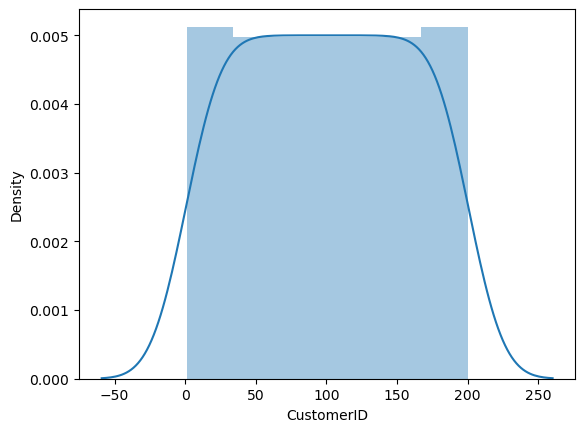

AxesSubplot(0.125,0.11;0.775x0.77)


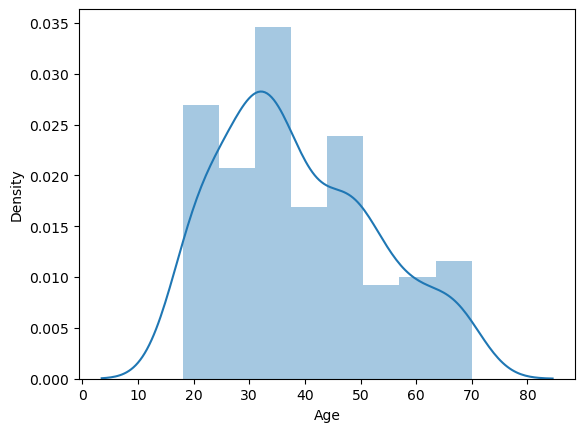

AxesSubplot(0.125,0.11;0.775x0.77)


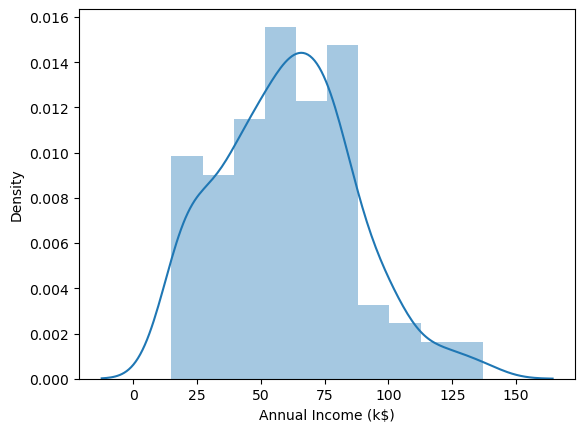

AxesSubplot(0.125,0.11;0.775x0.77)


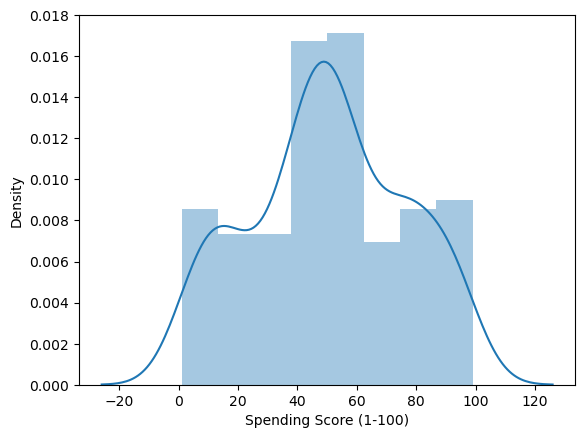

In [8]:
for i in df[col]:
    print(sns.distplot(df[i]))
    plt.show()

In [9]:
def box_plot(df,col):
    df.boxplot(col)
    plt.show()

CustomerID


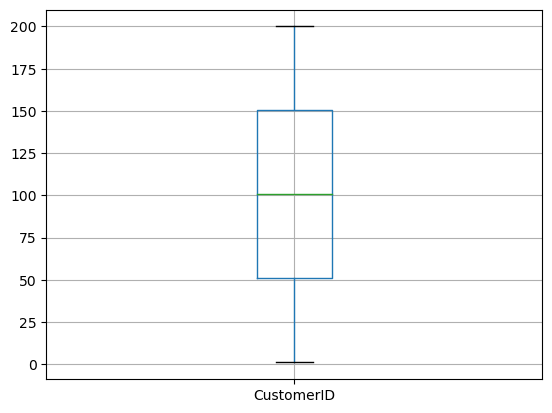

Age


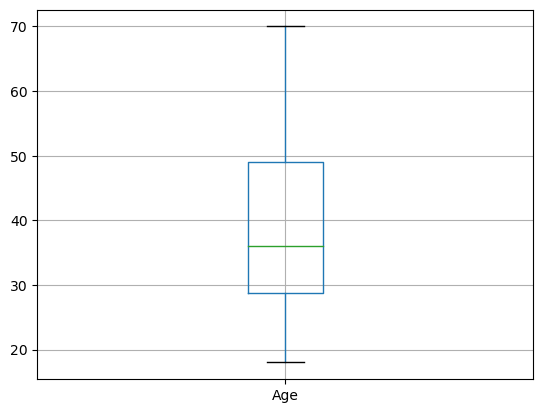

Annual Income (k$)


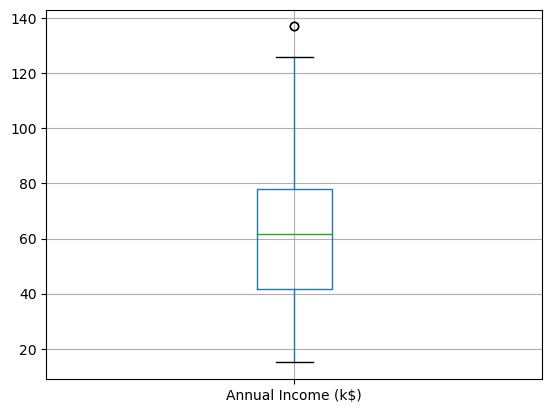

Spending Score (1-100)


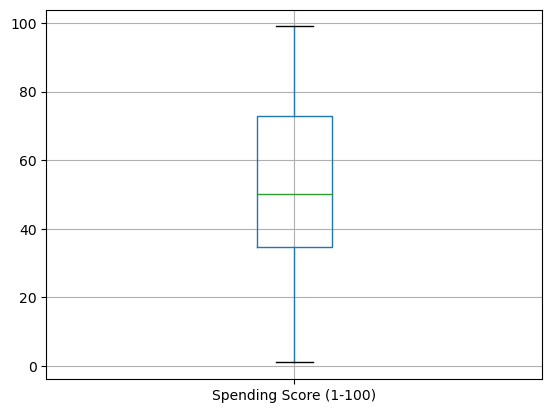

In [10]:
for i in df[col]:
    print(i)
    box_plot(df,i)
    plt.show()

In [11]:
q1=df["Annual Income (k$)"].quantile(0.25)
q3=df["Annual Income (k$)"].quantile(0.75)
iqr=q3-q1

In [12]:
dt=df[(df["Annual Income (k$)"]<q1-1.5*iqr)|(df["Annual Income (k$)"]>q3+1.5*iqr)]

In [13]:
dt

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


In [14]:
df.drop([198,199],axis=0,inplace=True)

<AxesSubplot:xlabel='Annual Income (k$)'>

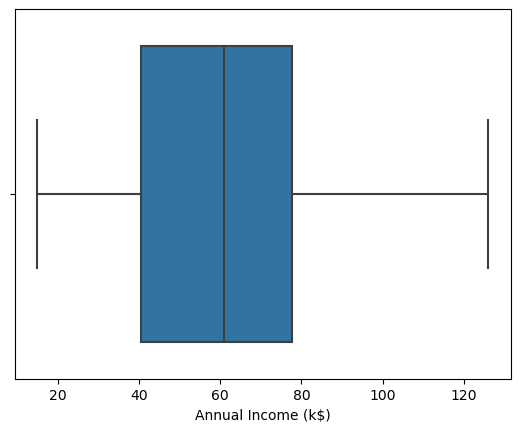

In [15]:
sns.boxplot(df["Annual Income (k$)"])

In [16]:
from scipy.stats import skew

<AxesSubplot:xlabel='Gender', ylabel='count'>

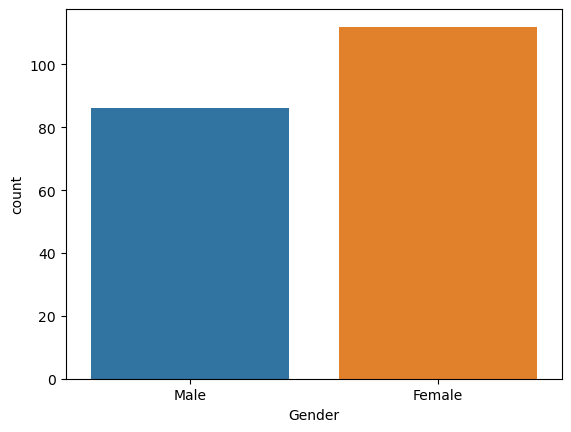

In [17]:
sns.countplot(df["Gender"])

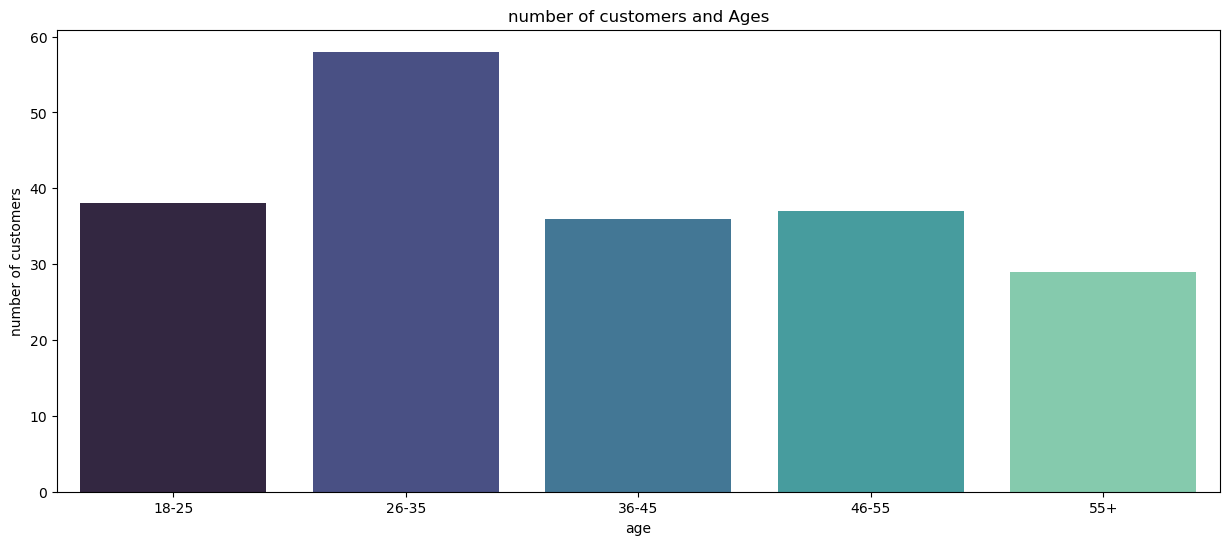

In [18]:
age_18_25=df.Age[(df.Age>=18)&(df.Age<=25)]
age_26_35=df.Age[(df.Age>=26)&(df.Age<=35)]
age_36_45=df.Age[(df.Age>=36)&(df.Age<=45)]
age_46_55=df.Age[(df.Age>=46)&(df.Age<=55)]
age_55above=df.Age[df.Age>=56]

agex=["18-25","26-35","36-45","46-55","55+"]
agey=[len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=agex,y=agey,palette="mako")
plt.title("number of customers and Ages")
plt.xlabel("age")
plt.ylabel("number of customers")
plt.show()

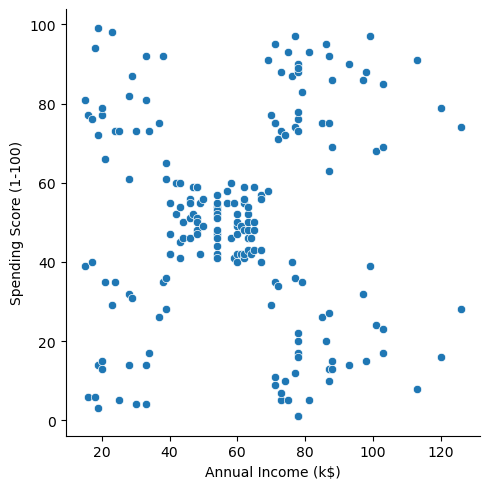

In [19]:
sns.relplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=df)

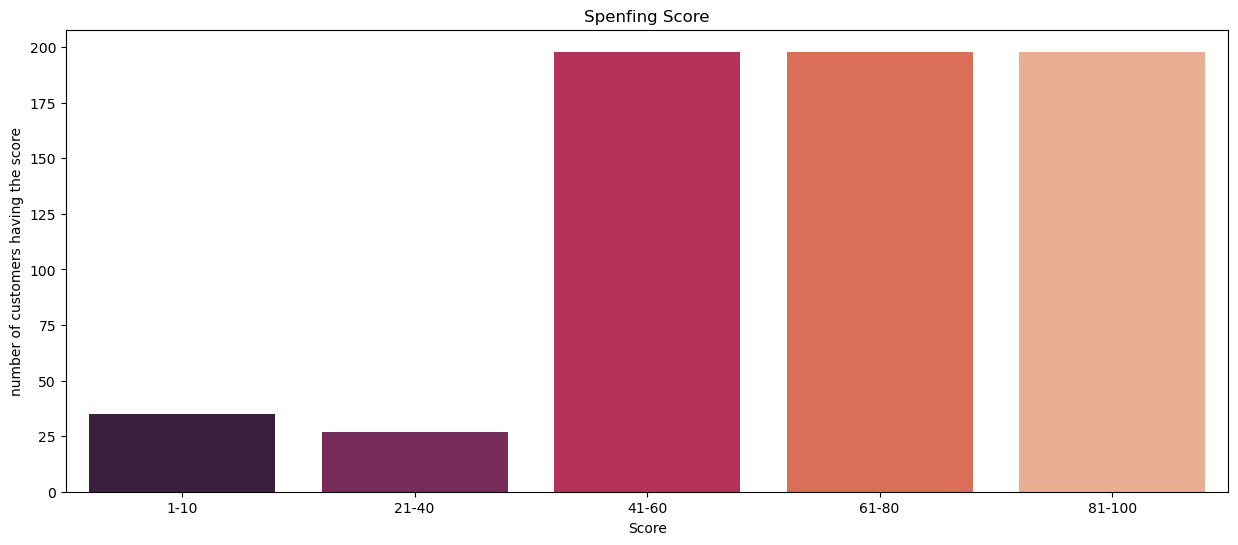

In [20]:
ss_1_20=df.Age[(df["Spending Score (1-100)"]>=1)&(df["Spending Score (1-100)"]<=20)]
ss_21_40=df.Age[(df["Spending Score (1-100)"]>=21)&(df["Spending Score (1-100)"]<=40)]
ss_41_60=df.Age[(df["Spending Score (1-100)"]>=41)&(df["Spending Score (1-100)"])<=60]
ss_61_80=df.Age[(df["Spending Score (1-100)"]>=61)&(df["Spending Score (1-100)"])<=80]
ss_81_100=df.Age[(df["Spending Score (1-100)"]>=81)&(df["Spending Score (1-100)"])<=100]

ssx=["1-10","21-40","41-60","61-80","81-100"]
ssy=[len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx,y=ssy,palette="rocket")
plt.title("Spenfing Score")
plt.xlabel("Score")
plt.ylabel("number of customers having the score")
plt.show()

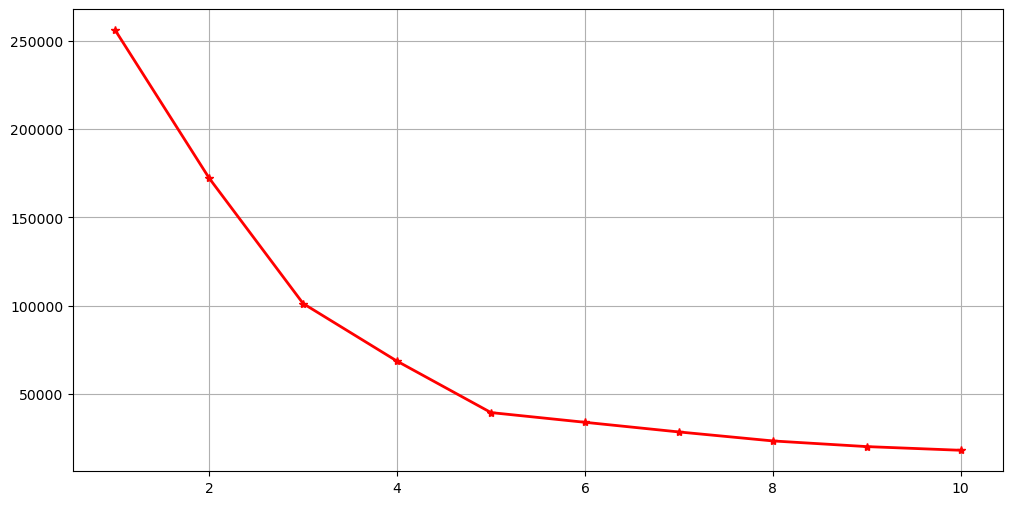

In [21]:
x1=df.loc[:,["Annual Income (k$)","Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="*")
plt.show()

In [22]:
kmeans= KMeans(n_clusters= 5,init="k-means++", random_state=0)
y_kmeans=kmeans.fit_predict(x1)


In [23]:
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2])

In [24]:
df["ykmeans"]=y_kmeans

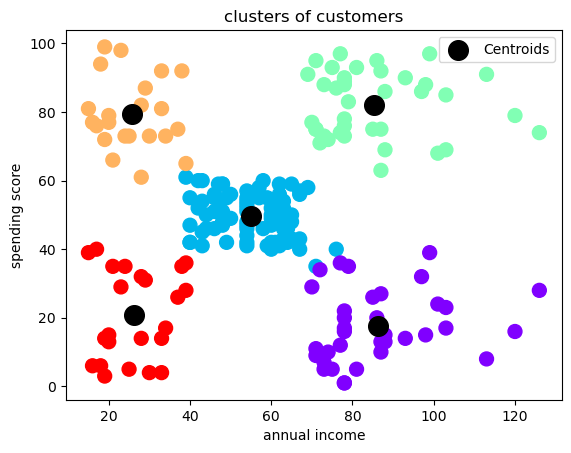

In [25]:
plt.scatter(x1[:,0],x1[:,1],c=y_kmeans,s=100,cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='black',label="Centroids")

plt.xlabel('annual income')
plt.ylabel("spending score")
plt.title('clusters of customers')
plt.legend()
plt.show()

In [26]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),ykmeans
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
193,194,Female,38,113,91,2
194,195,Female,47,120,16,0
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0


In [27]:
x=df.iloc[:,3:5]

In [28]:
y=df["ykmeans"]

In [46]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=1,random_state=3)

In [47]:
def train_model(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtrain)
    
    train_score=model.score(xtrain,ytrain)
    test_score=model.score(xtest,ytest)
    
    print("train_score:",train_score,"\n","test_score:",test_score)
    return model
   

In [31]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import classification_report

In [32]:
gnb=train_model(GaussianNB())

train_score: 0.9897435897435898 
 test_score: 1.0


In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dt=train_model(DecisionTreeClassifier())

train_score: 1.0 
 test_score: 1.0


In [35]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
193,113,91
194,120,16
195,120,79
196,126,28


In [36]:
x=df.loc[:,["Annual Income (k$)","Spending Score (1-100)"]]

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
ss=StandardScaler()
x=ss.fit_transform(x)

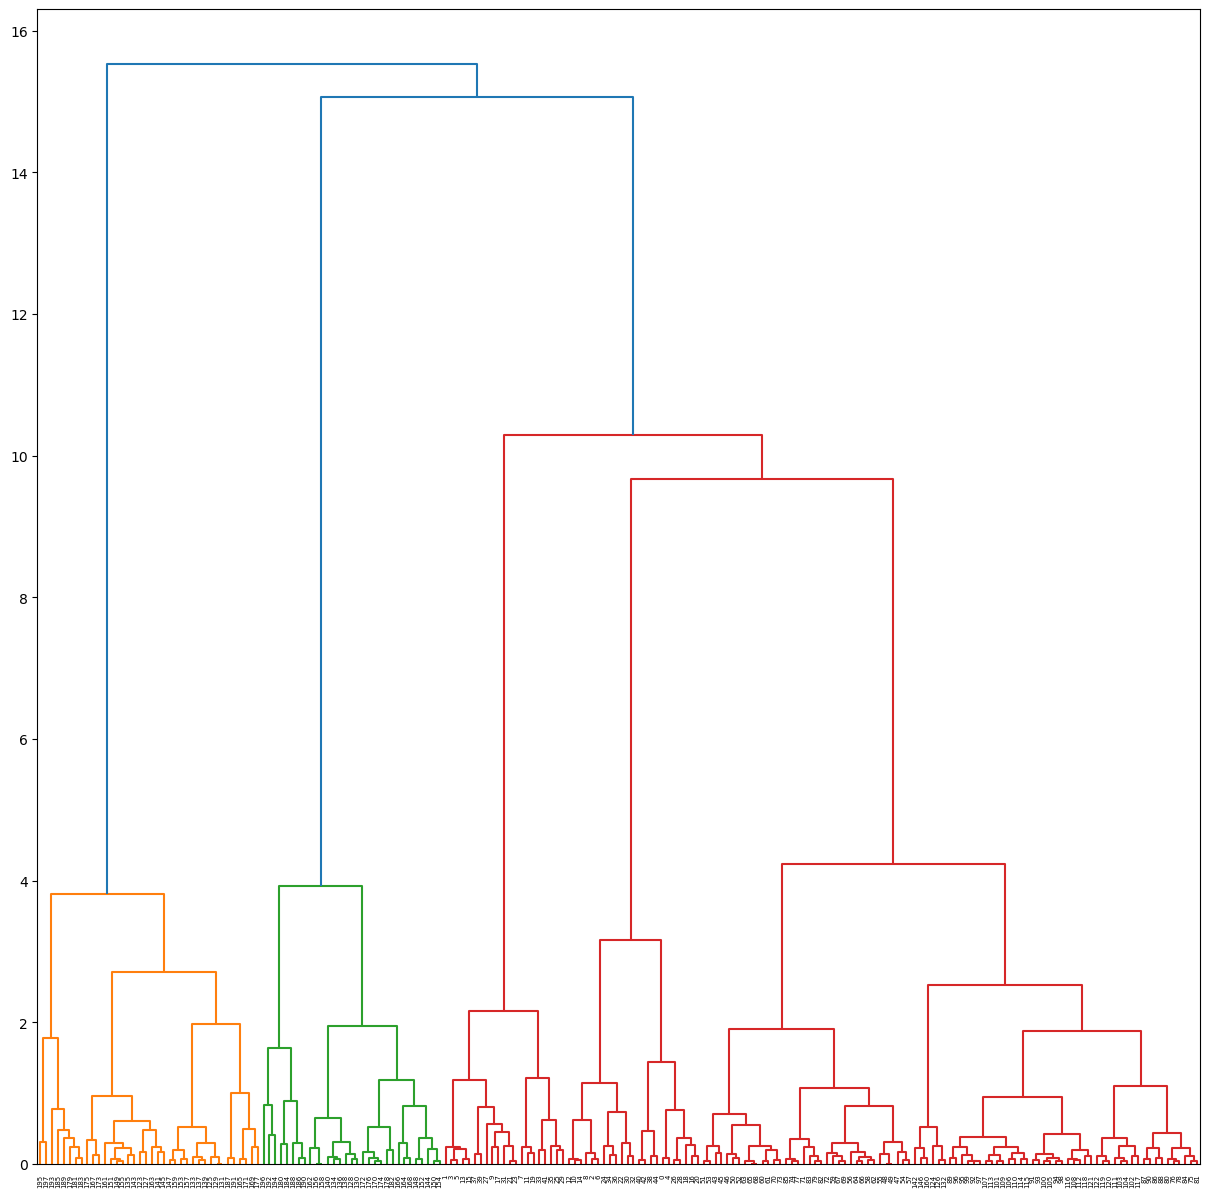

In [41]:
from scipy.cluster import hierarchy as hi
lk=hi.linkage(x,method="ward")
plt.figure(figsize=(15,15))
ddg=hi.dendrogram(lk)

In [42]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5)
ylabal=hc.fit_predict(x)

In [43]:
df["hcout"]=ylabal

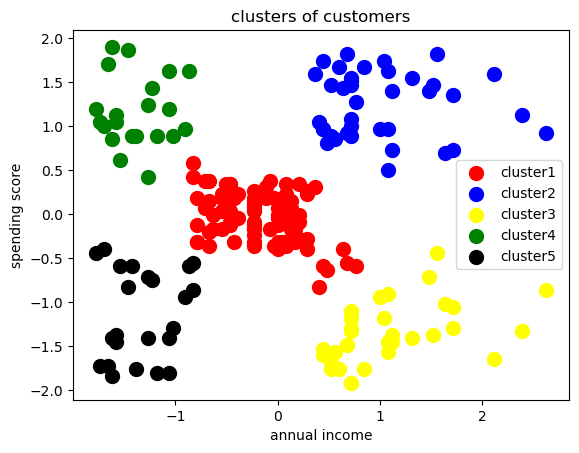

In [44]:
plt.scatter(x[ylabal==0,0],x[ylabal==0,1],s=100,c="red",label="cluster1")
plt.scatter(x[ylabal==1,0],x[ylabal==1,1],s=100,c="blue",label="cluster2")
plt.scatter(x[ylabal==2,0],x[ylabal==2,1],s=100,c="yellow",label="cluster3")
plt.scatter(x[ylabal==3,0],x[ylabal==3,1],s=100,c="green",label="cluster4")
plt.scatter(x[ylabal==4,0],x[ylabal==4,1],s=100,c="black",label="cluster5")

plt.xlabel('annual income')
plt.ylabel("spending score")
plt.title('clusters of customers')
plt.legend()
plt.show()

In [45]:
dtr=train_model(DecisionTreeClassifier())

train_score: 1.0 
 test_score: 1.0
